# Linear regression with TensorFlow

This notebooks is dedicated to Linear regression. It is based on a code from __Aymeric Damien__.  
[Check the source here](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py)

(please note that I've made several litle change to the code to make is easier to explain as a notebook)

The code is super straigh forward, so let's dive in!

## Import
The classical import, plus the %mapplotlib magical trick to have matplotlib working with Jupyter

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

import tensorflow as tf
import numpy as np

## Set up the data
Machine learning need data!  
So let's create a training set, and a testing set.  
We'll train our model using the training set, and we'll use the testing set to check the result.

size of the training samples: 17


<IPython.core.display.Javascript object>


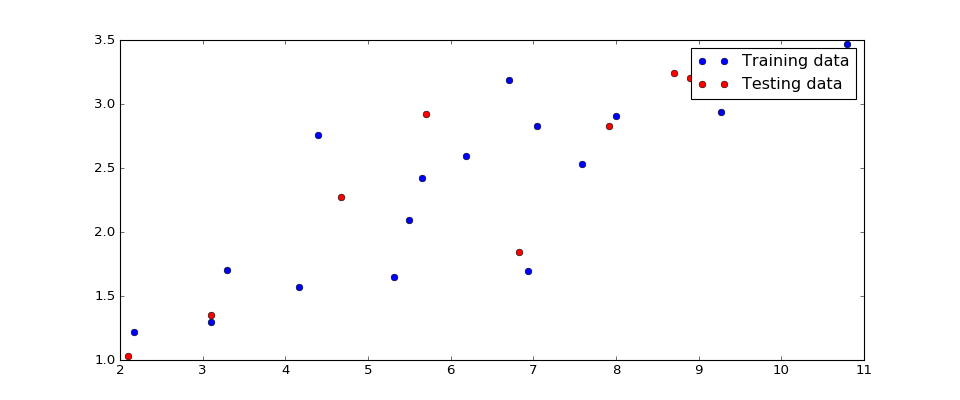

In [2]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

# Testing example
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

n_samples = train_X.shape[0]
print "size of the training samples:", n_samples

fig1 = plt.figure(figsize=(12,5))
plt.plot(train_X, train_Y, 'bo', label='Training data')
plt.plot(test_X, test_Y, 'ro', label='Testing data')
plt.legend()
plt.show()

## Creation of the model

The model is a simple linear model:  
__pred = W*X + b__

In [3]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(tf.ones([1])*0.1, name="weight")
b = tf.Variable(tf.ones([1])*1.2, name="bias")

# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

## Loss function

The loss (or cost) is a key concept in all neural networks trainning. It is a value that describe how bag/good is our model.  
It is always positive, the closest to zero, the better is our model.  
(A good model is a model where the predicted output is close to the training output)  
During the trainning phase we want to minimize the loss.  

loss here is the sum of all (prediction-real)^2 

In [4]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))

## Hyper parameters
Hyper parameters are not parameters of the models.  
We use them as parameters for the optimisation

In [5]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 100

## Optimisation
Optimisation will use the Gradient Descent technique.  
__[here](http://karpathy.github.io/neuralnets/) a great source to understand this technic in detail.__

In [6]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Launch the graph


We are not using the _"#with tf.Session() as sess:"_ to make it more convinent to use in a notebook.  
So we need to add a sess.close() at the end.

In [7]:
# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
sess = tf.Session() 
sess.run(init)

## Do the trainning
You can see how cost function is evolving during the training and how the model evolve during the training. 

<IPython.core.display.Javascript object>


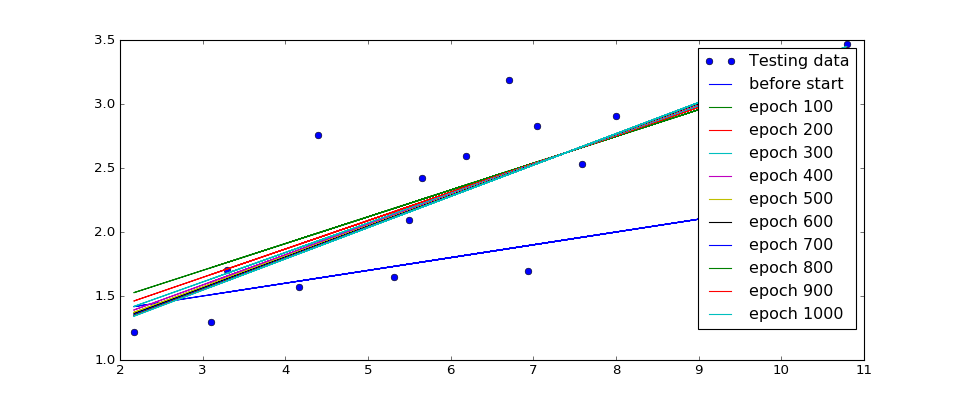

Epoch: 0100 cost= 2.784464359 W= [ 0.20926358] b= [ 1.07236481]
Epoch: 0200 cost= 2.699462175 W= [ 0.22170711] b= [ 0.98028684]
Epoch: 0300 cost= 2.663408995 W= [ 0.22983742] b= [ 0.92012471]
Epoch: 0400 cost= 2.648170948 W= [ 0.23514959] b= [ 0.8808164]
Epoch: 0500 cost= 2.641766071 W= [ 0.23862037] b= [ 0.85513395]
Epoch: 0600 cost= 2.639096737 W= [ 0.2408883] b= [ 0.83835196]
Epoch: 0700 cost= 2.638000250 W= [ 0.24237007] b= [ 0.82738703]
Epoch: 0800 cost= 2.637560368 W= [ 0.24333818] b= [ 0.82022333]
Epoch: 0900 cost= 2.637390375 W= [ 0.24397077] b= [ 0.81554246]
Epoch: 1000 cost= 2.637329817 W= [ 0.24438418] b= [ 0.81248343]


<IPython.core.display.Javascript object>


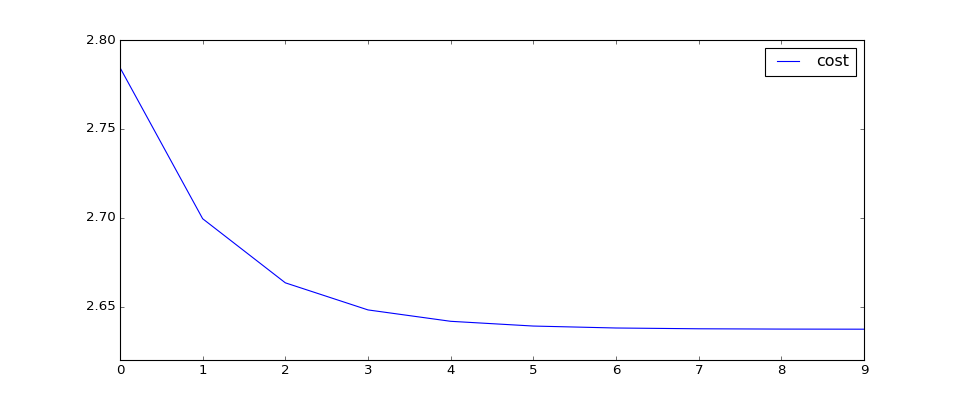

In [8]:
plt.figure(figsize=(12,5))
plt.plot(train_X, train_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='before start ')

cost_optimisation = []

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b)
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='epoch '+ str(epoch+1))
        # save the value of the cost to draw it
        cost_optimisation.append(c)
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(range(len(cost_optimisation)), cost_optimisation, label='cost')
plt.legend()
plt.show()

Optimization Finished!
Training cost= 2.63733 W= [ 0.24438418] b= [ 0.81248343] 

Testing... (Mean square loss Comparison)
Testing cost= 0.0814756
Absolute mean square loss difference: 2.55585


<IPython.core.display.Javascript object>


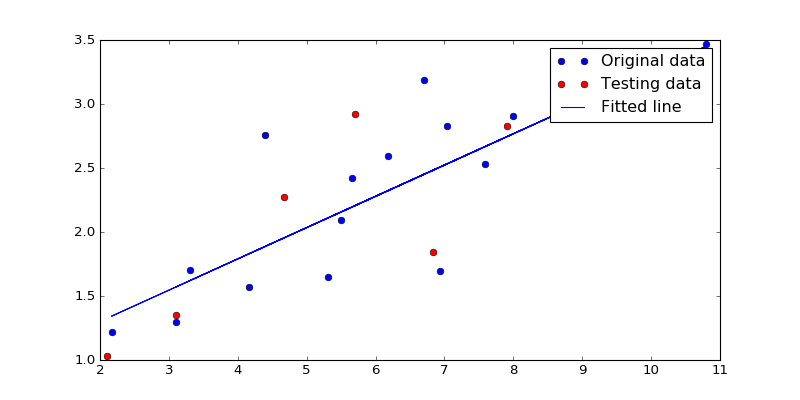

In [9]:
 print "Optimization Finished!"
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

print "Testing... (Mean square loss Comparison)"
testing_cost = sess.run(
    tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
    feed_dict={X: test_X, Y: test_Y})  # same function as cost above
print "Testing cost=", testing_cost
print "Absolute mean square loss difference:", abs(
    training_cost - testing_cost)

#Graphic display
plt.figure(figsize=(10,5))
plt.plot(train_X, train_Y, 'bo', label='Original data')
plt.plot(test_X, test_Y, 'ro', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

## Check with the trainning data

## Closing the session

Don't forget to close the session if you don't use the "with" statement

In [10]:
sess.close()

Hope this is usefull.

Feedback welcome __@dh7net__